## Plant Segmentation & Detection
The first question is related with image segmentation & detection using classical computer vision approaches. 

In [1]:
# importing crucial libraries
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

## Things in Task 1
As given from the assessment brief, following are the components of task 1:
- Automated Plant Object Segmentation
- Evaluation of Segmentatio Using Dice Similarity
- Automated Leaf Detection

The implementation of each of these functions will be given below.

### `segment_pkant()` Function for Segmentation

In [2]:
# Task A: automated plant object segmentation
def segment_plant(image_path):
    img = cv2.imread(image_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    segmented_mask = cv2.bitwise_and(img, img, mask=mask)
    gray_segmented_mask = cv2.cvtColor(segmented_mask, cv2.COLOR_BGR2GRAY)
    _, binary_segmented_mask = cv2.threshold(gray_segmented_mask, 1, 255, cv2.THRESH_BINARY)
    return binary_segmented_mask

### `calculate_dice_similarity()` Function 
The `calculate_dice_similarity()` is used for computing the dice similarity score.

In [3]:
# Task B: segmentation evaluation
def calculate_dice_similarity(segmented_mask, ground_truth_mask):
    intersection = np.logical_and(segmented_mask, ground_truth_mask)
    dice_similarity = (2 * np.sum(intersection)) / (np.sum(segmented_mask) + np.sum(ground_truth_mask))
    return dice_similarity

### `detect_leaves()` Function
The `detect_leaves()`function is capable of making an automated detection of leaves.

In [4]:
# Task C: automated leaf detection and counting
def detect_leaves(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    leaf_count = len(contours)
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return img, leaf_count

### Loading the Dataset

In [5]:
# Load leaf counts from CSV
leaf_counts_df = pd.read_csv("leaf_counts.csv")
leaf_counts_df.head(3)

file  count
0  plant001      7
1  plant002      7
2  plant003      8

In [6]:
leaf_counts_dict = dict(zip(leaf_counts_df["file"], leaf_counts_df["count"]))
leaf_counts_dict

{'plant001': 7,
 'plant002': 7,
 'plant003': 8,
 'plant004': 8,
 'plant005': 8,
 'plant006': 7,
 'plant007': 8,
 'plant008': 6,
 'plant009': 6,
 'plant010': 7,
 'plant011': 8,
 'plant012': 9,
 'plant013': 8,
 'plant014': 8,
 'plant015': 6,
 'plant016': 7}

In [7]:
ds_scores = []
leaf_count_diffs = []

### Processing All Images 
In this step, all images in the directory will be processed and segmentation, dice similarity & Leaf detection will be applied. 

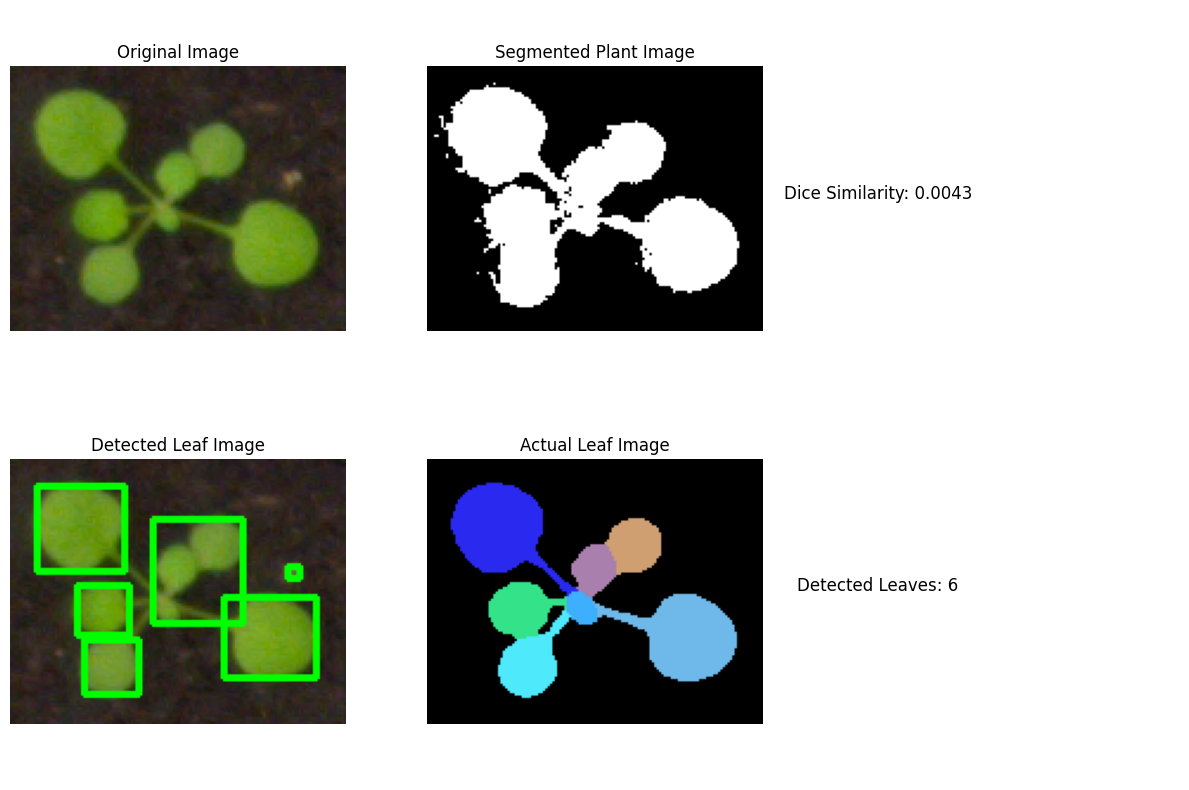

Plant 1: DS = 0.0043, Detected Leaves = 6, Actual Leaves = 7


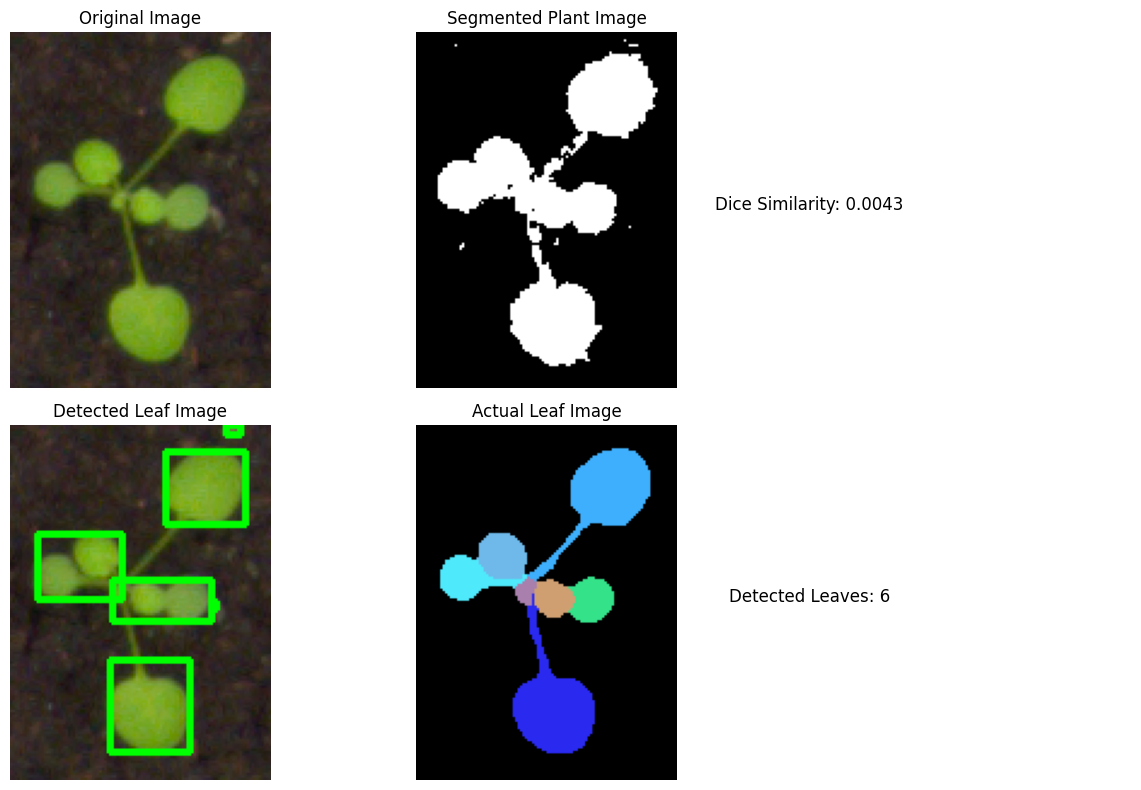

Plant 2: DS = 0.0043, Detected Leaves = 6, Actual Leaves = 7


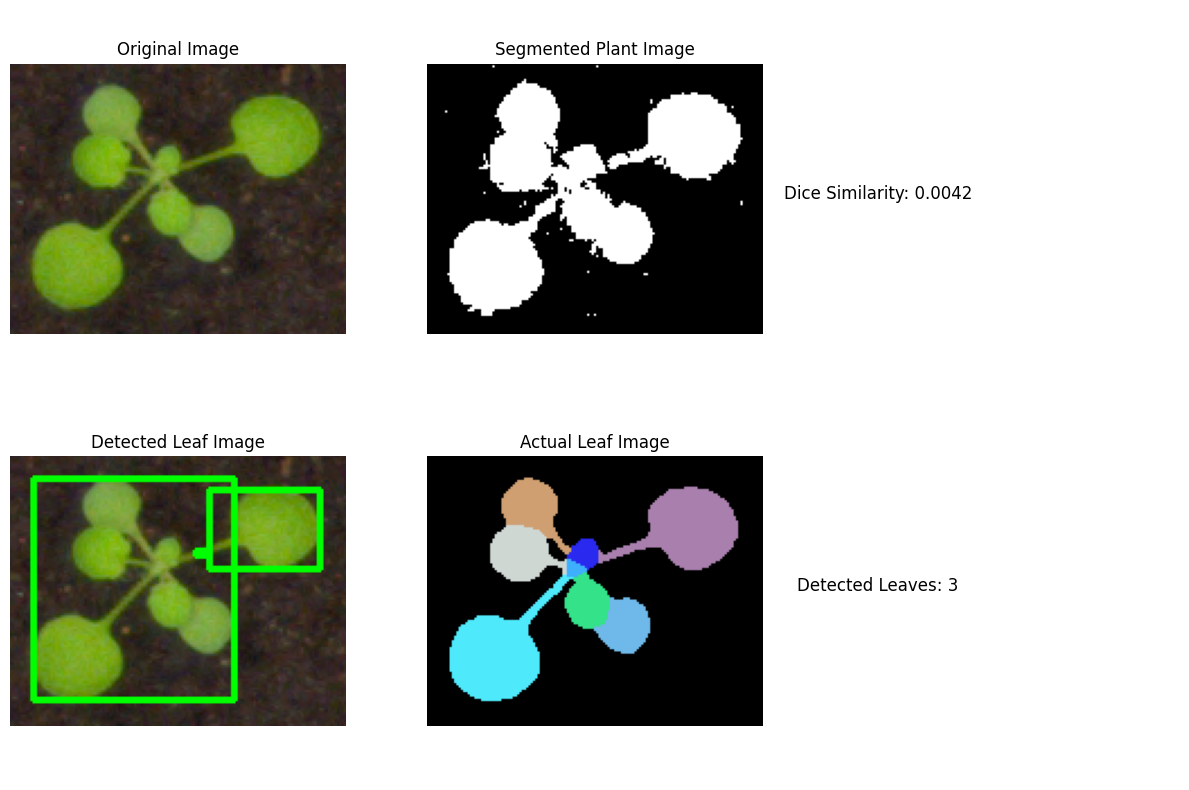

Plant 3: DS = 0.0042, Detected Leaves = 3, Actual Leaves = 8


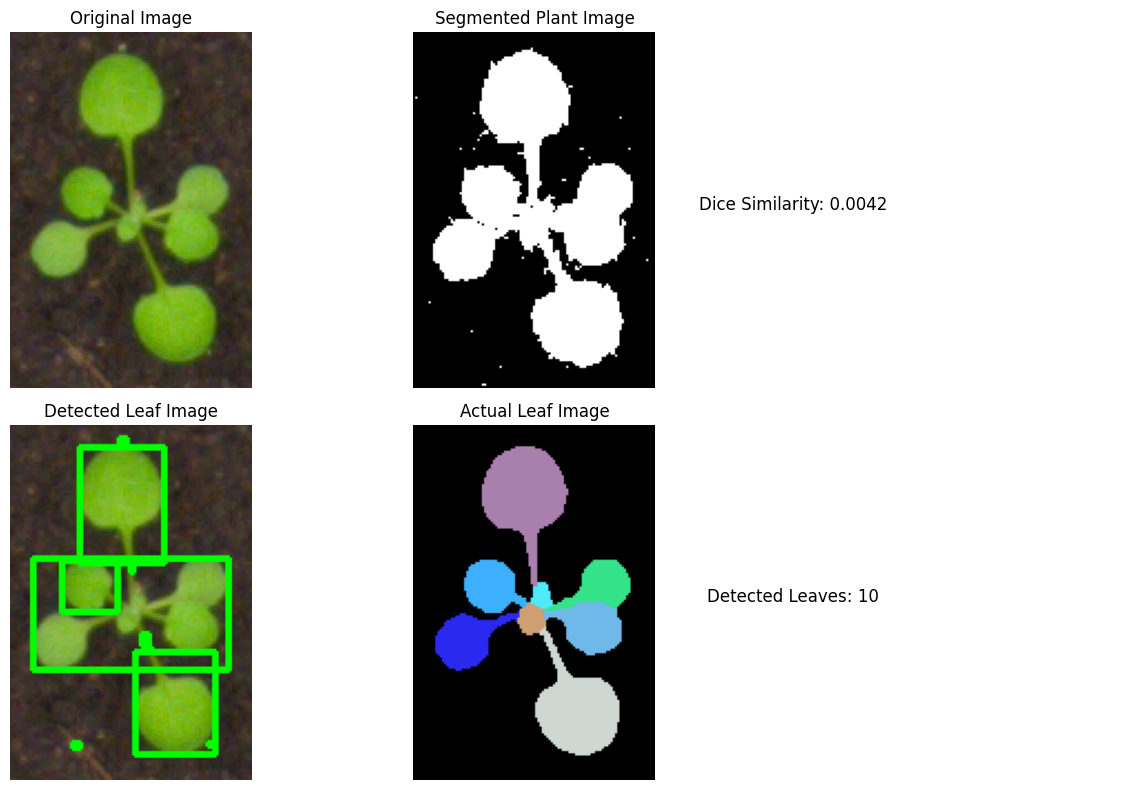

Plant 4: DS = 0.0042, Detected Leaves = 10, Actual Leaves = 8


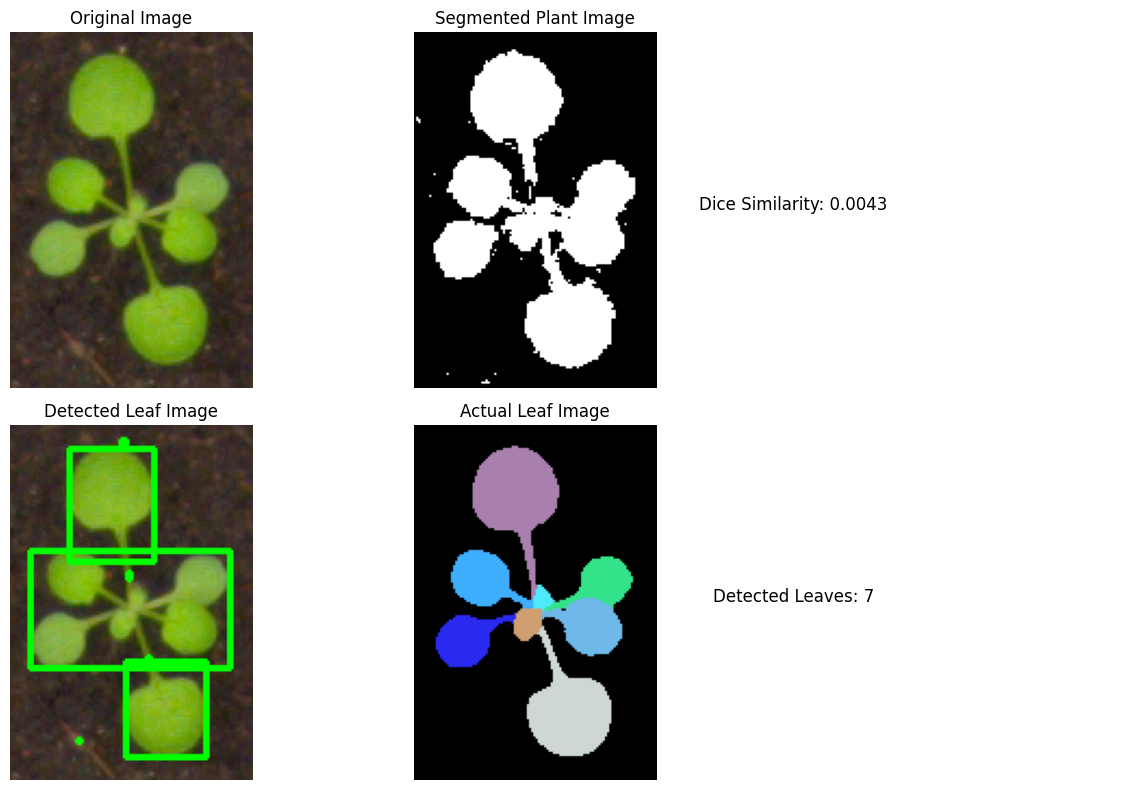

Plant 5: DS = 0.0043, Detected Leaves = 7, Actual Leaves = 8


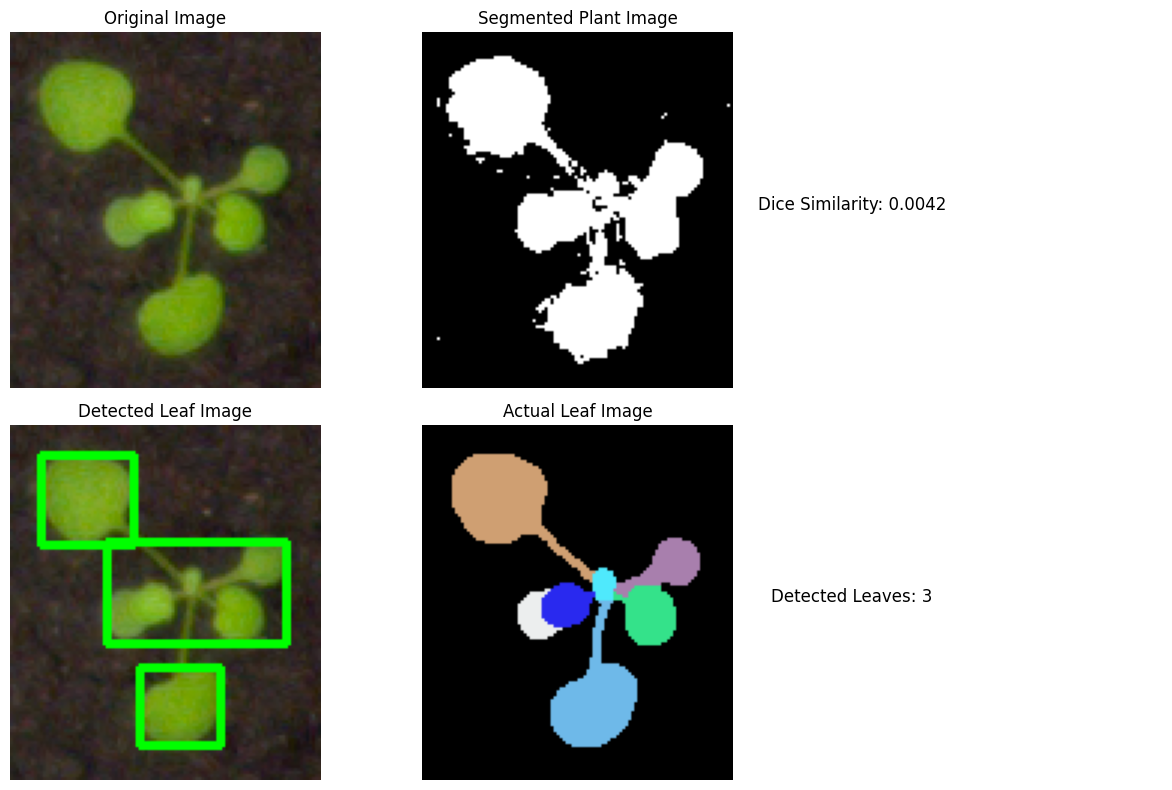

Plant 6: DS = 0.0042, Detected Leaves = 3, Actual Leaves = 7


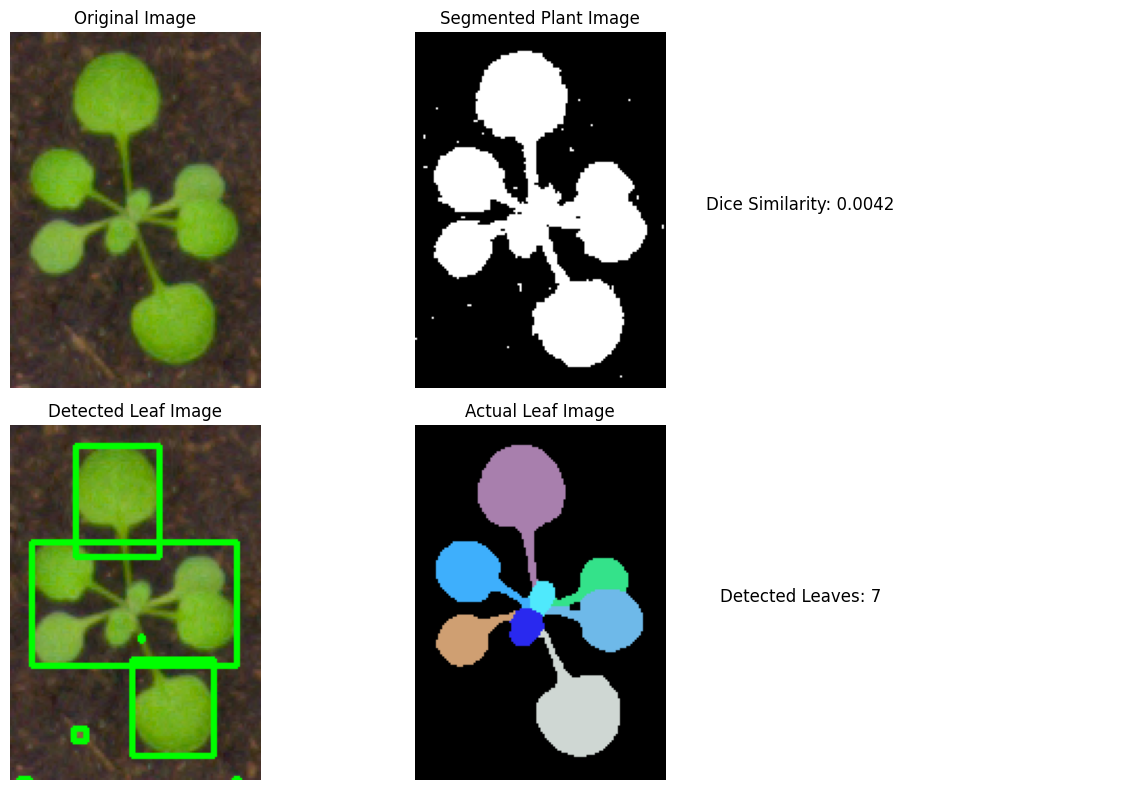

Plant 7: DS = 0.0042, Detected Leaves = 7, Actual Leaves = 8


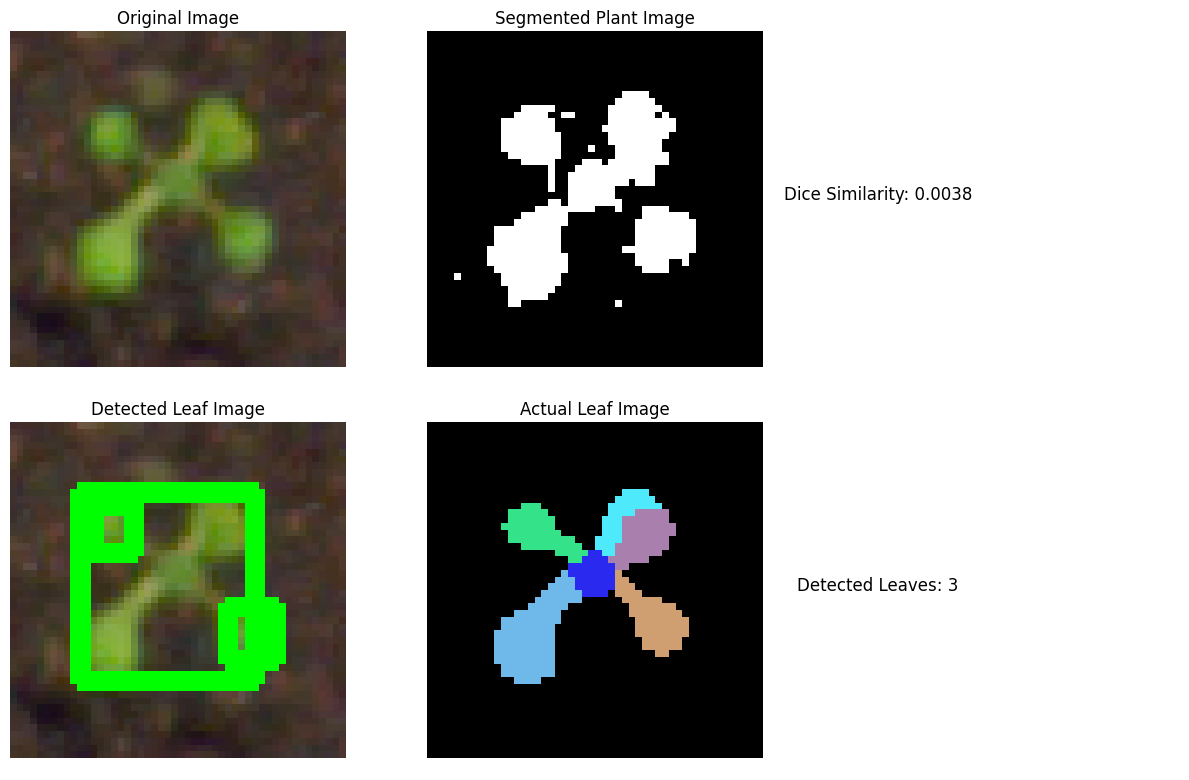

Plant 8: DS = 0.0038, Detected Leaves = 3, Actual Leaves = 6


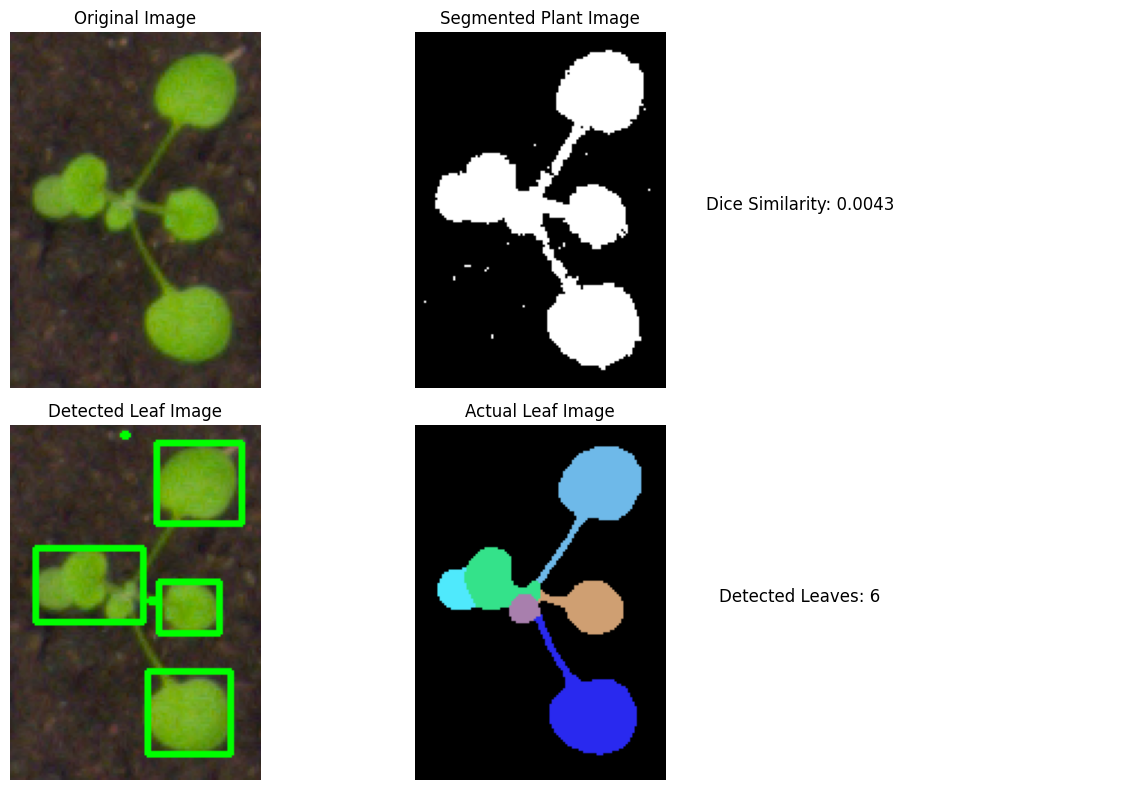

Plant 9: DS = 0.0043, Detected Leaves = 6, Actual Leaves = 6


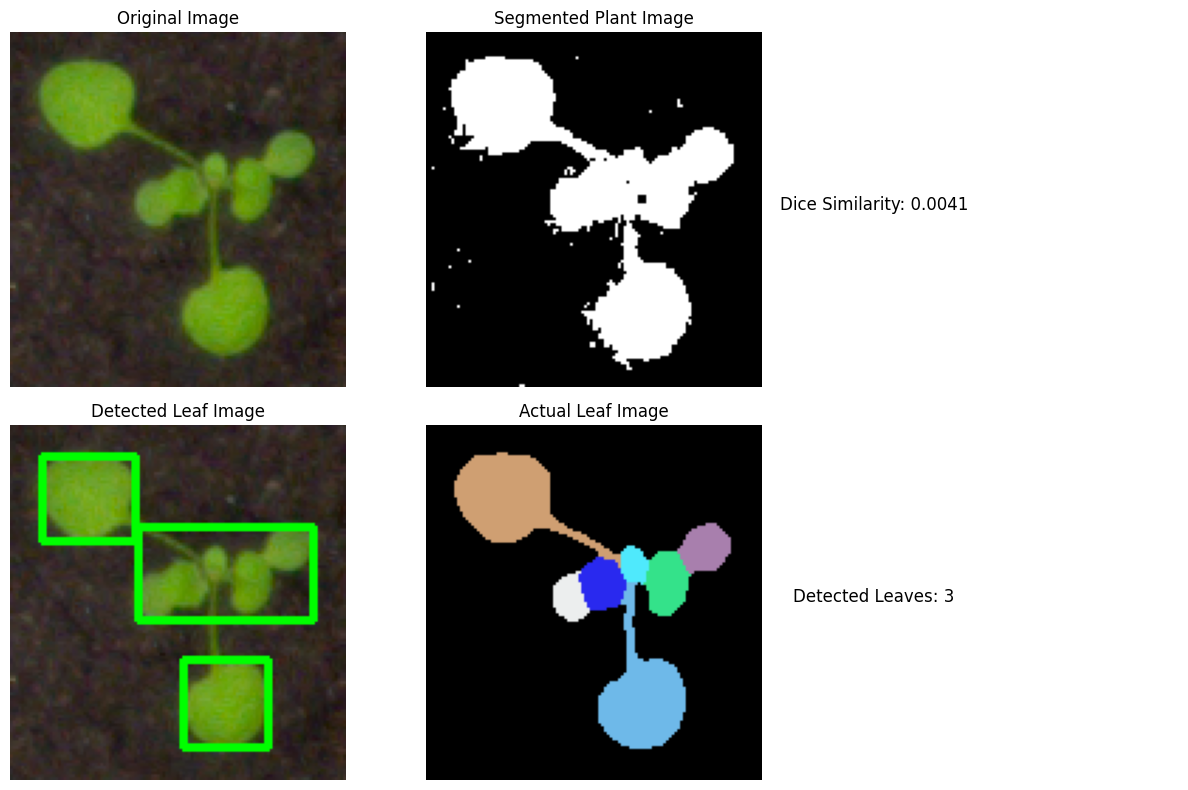

Plant 10: DS = 0.0041, Detected Leaves = 3, Actual Leaves = 7


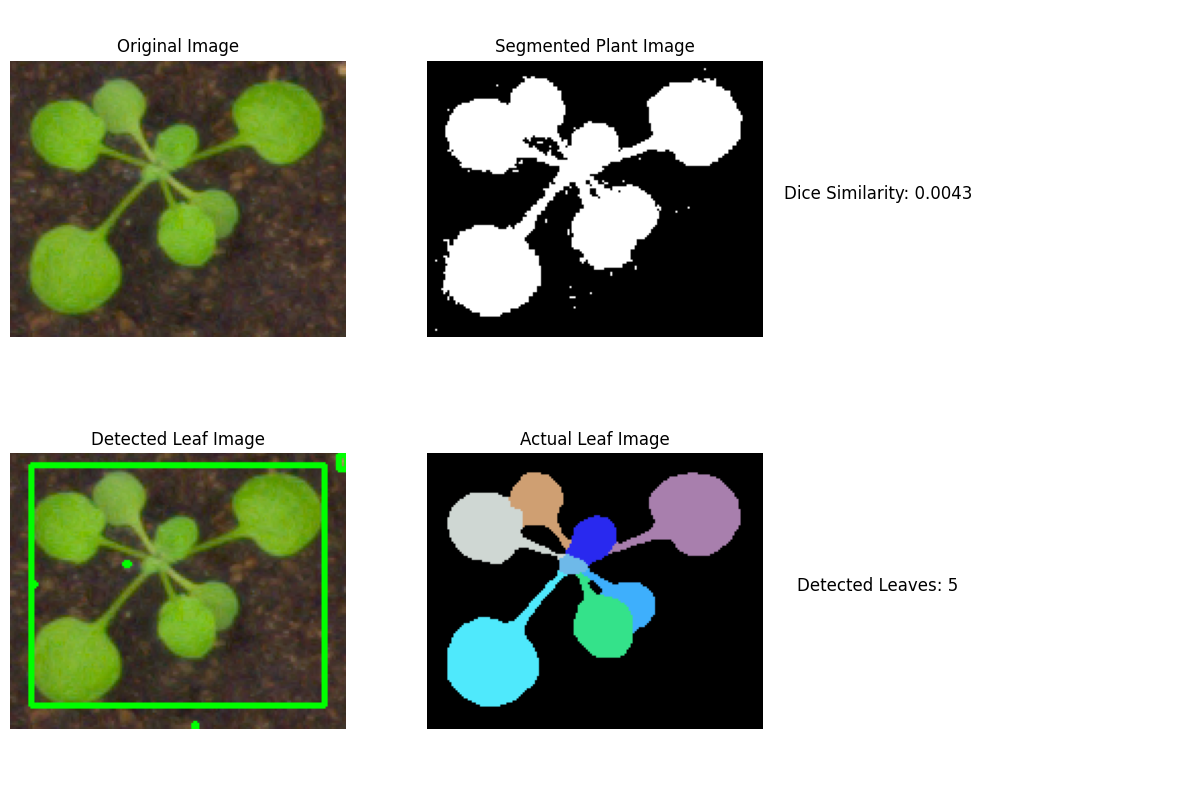

Plant 11: DS = 0.0043, Detected Leaves = 5, Actual Leaves = 8


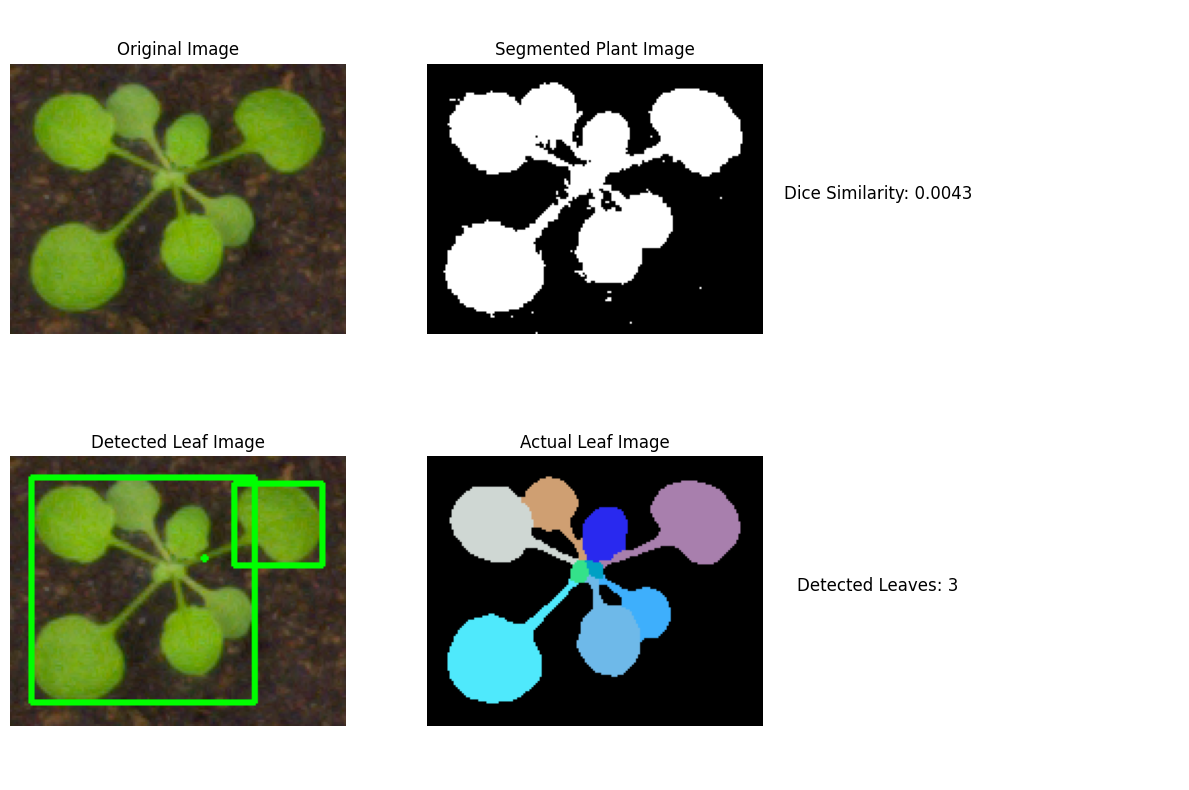

Plant 12: DS = 0.0043, Detected Leaves = 3, Actual Leaves = 9


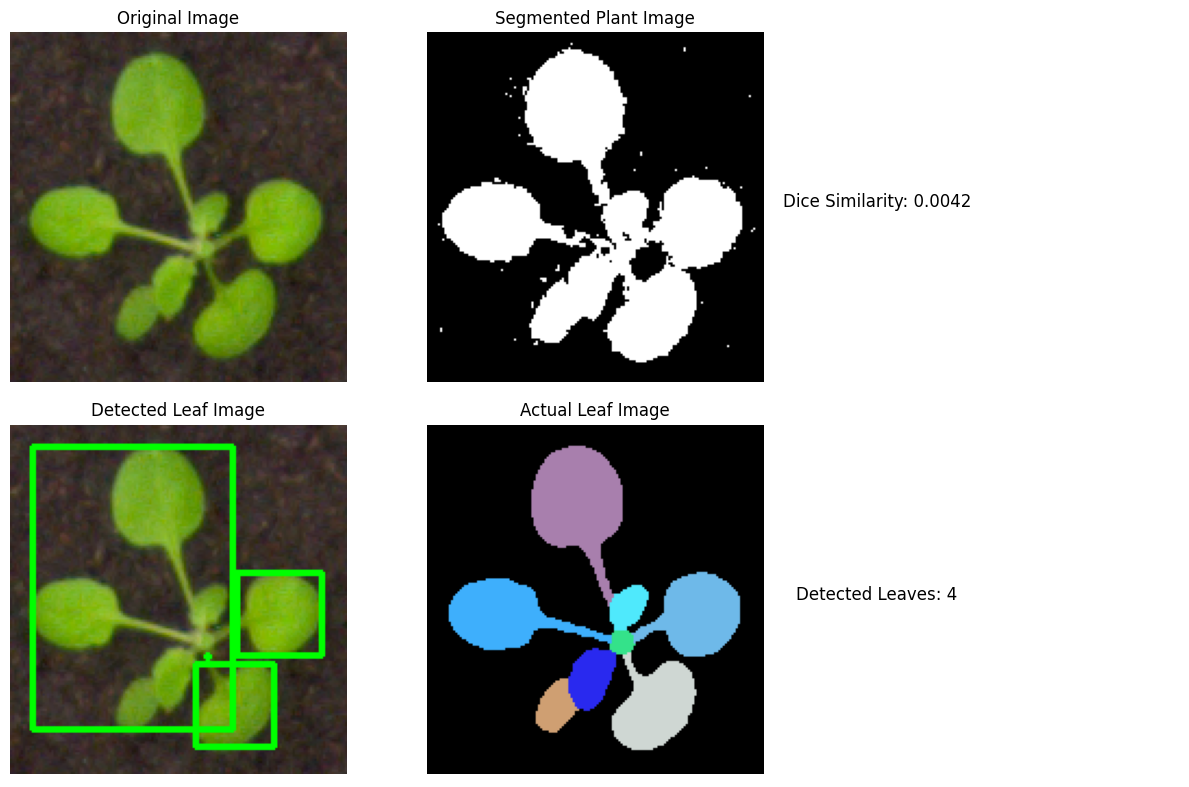

Plant 13: DS = 0.0042, Detected Leaves = 4, Actual Leaves = 8


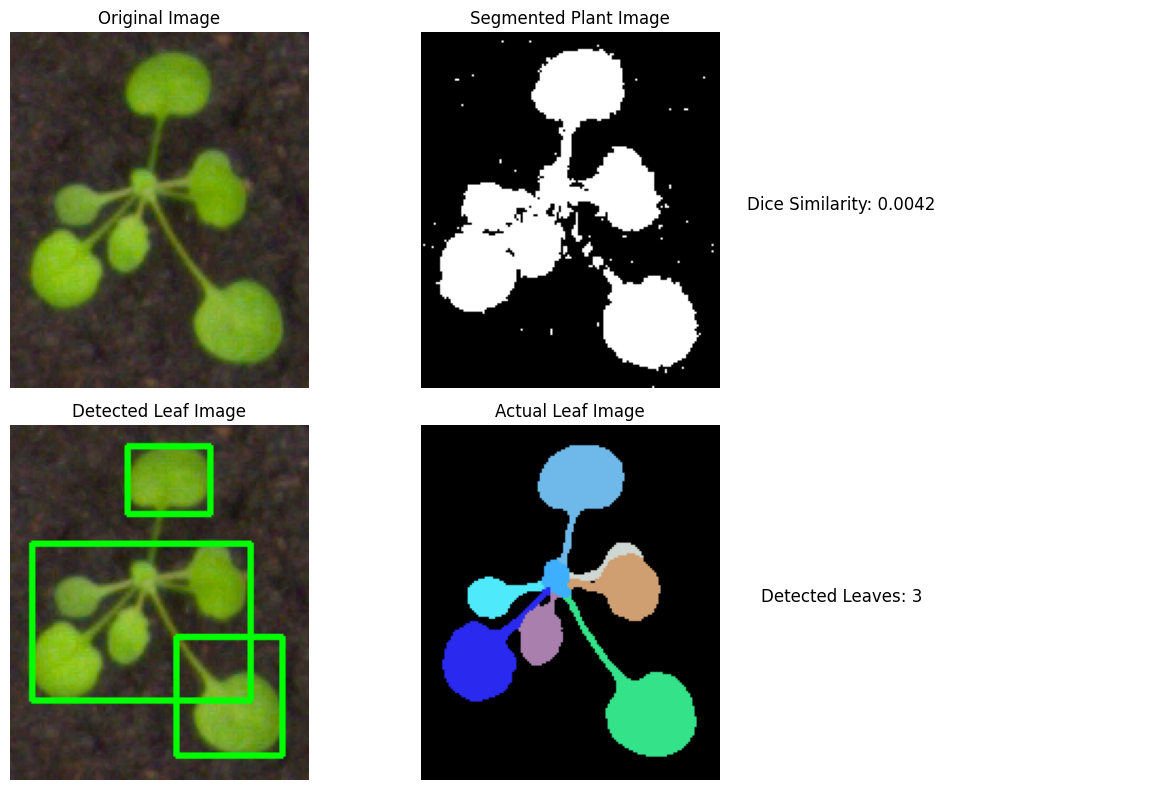

Plant 14: DS = 0.0042, Detected Leaves = 3, Actual Leaves = 8


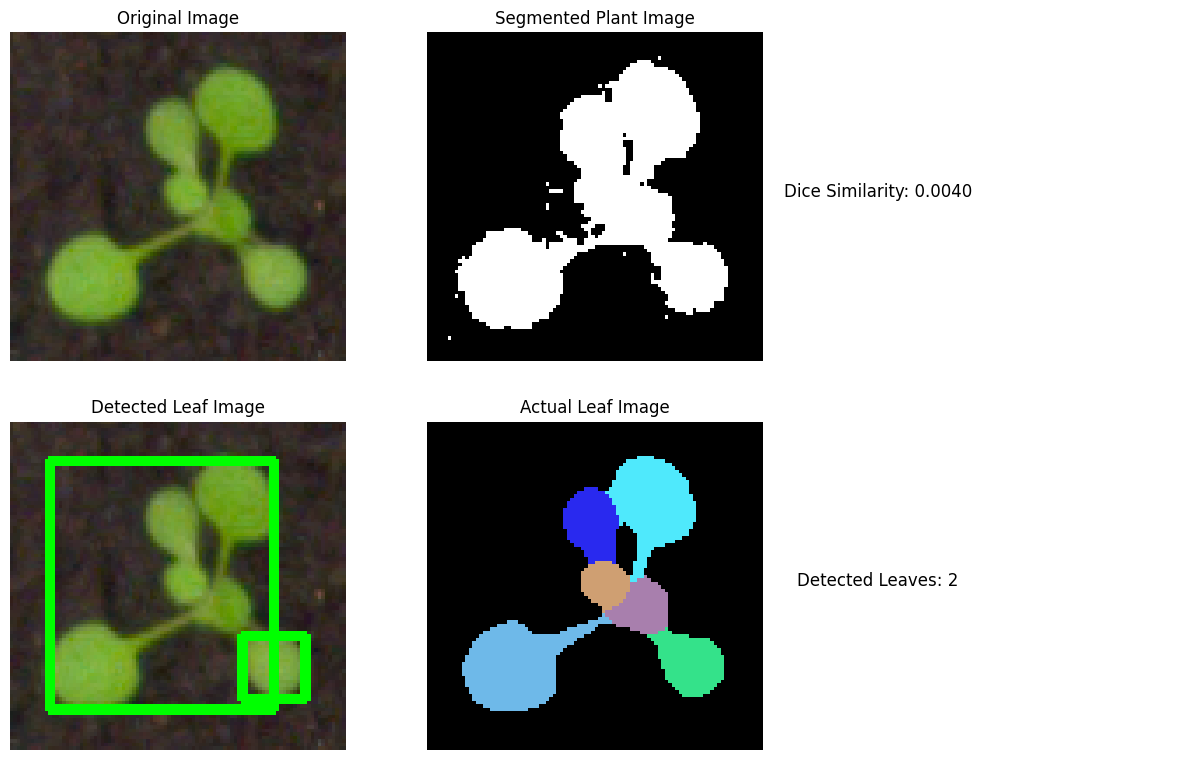

Plant 15: DS = 0.0040, Detected Leaves = 2, Actual Leaves = 6


<Figure size 640x480 with 0 Axes>

In [13]:
# Lists to store calculated values
ds_scores = []
leaf_count_diffs = []

# processing images and generating the required outputs
for i in range(1, 16):
    image_name = f"plant{str(i).zfill(3)}"
    image_path = os.path.join("plant image dataset", "Plant", f"{image_name}_rgb.png")
    ground_truth_path = os.path.join("plant image dataset", "Ground Truth", f"{image_name}_label.png")
    
    # Task a: Plant segmentation
    segmented_plant = segment_plant(image_path)
    
    # Task b: Segmentation evaluation
    ground_truth_mask = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    
    # appending dice score to list
    dice_similarity = calculate_dice_similarity(segmented_plant, ground_truth_mask)
    
    # Task c: Leaf detection
    leaf_detection_result, leaf_count = detect_leaves(image_path)
    
    ds_scores.append(dice_similarity)
    count_diffs = np.abs(leaf_counts_dict[image_name] - leaf_count)
    
    # appending leaf count to list
    leaf_count_diffs.append(count_diffs)
    
    # Display and save results
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 2)
    plt.imshow(segmented_plant, cmap="gray")
    plt.title("Segmented Plant Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 3)
    plt.text(0.1, 0.5, f"Dice Similarity: {dice_similarity:.4f}", fontsize=12, ha="center")
    plt.axis("off")
    
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(leaf_detection_result, cv2.COLOR_BGR2RGB))
    plt.title("Detected Leaf Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 5)
    plt.imshow(cv2.imread(ground_truth_path, cv2.IMREAD_COLOR))
    plt.title("Actual Leaf Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 6)
    plt.text(0.1, 0.5, f"Detected Leaves: {leaf_count}", fontsize=12, ha="center")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
    
    print(f"Plant {i}: DS = {dice_similarity:.4f}, Detected Leaves = {leaf_count}, Actual Leaves = {leaf_counts_dict[image_name]}")

plt.tight_layout()
plt.show()

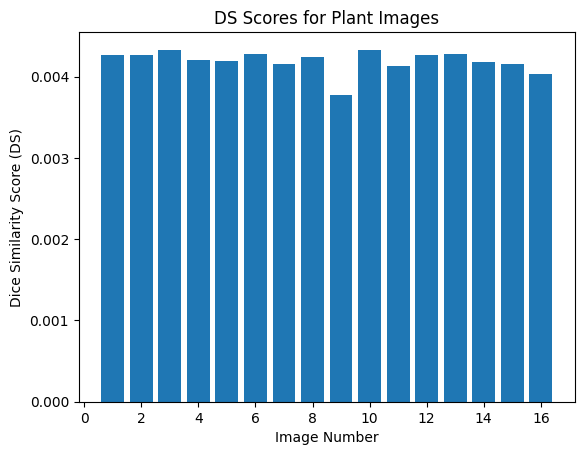

Mean DS: 0.004194
Mean Leaf Count Difference: 2.933


In [12]:
# calculating mean DS and mean leaf count difference
mean_ds = np.mean(ds_scores)
mean_leaf_count_diff = np.mean(leaf_count_diffs)

# Plot bar graph for DS scores
plt.bar(range(1, 17), ds_scores)
plt.xlabel("Image Number")
plt.ylabel("Dice Similarity Score (DS)")
plt.title("DS Scores for Plant Images")
plt.show()

# displaying mean DS and mean leaf count difference
print("Mean DS: %.6f" % mean_ds)
print("Mean Leaf Count Difference: %.3f" % mean_leaf_count_diff)

### Comparing `plant_002` & `plant_005`

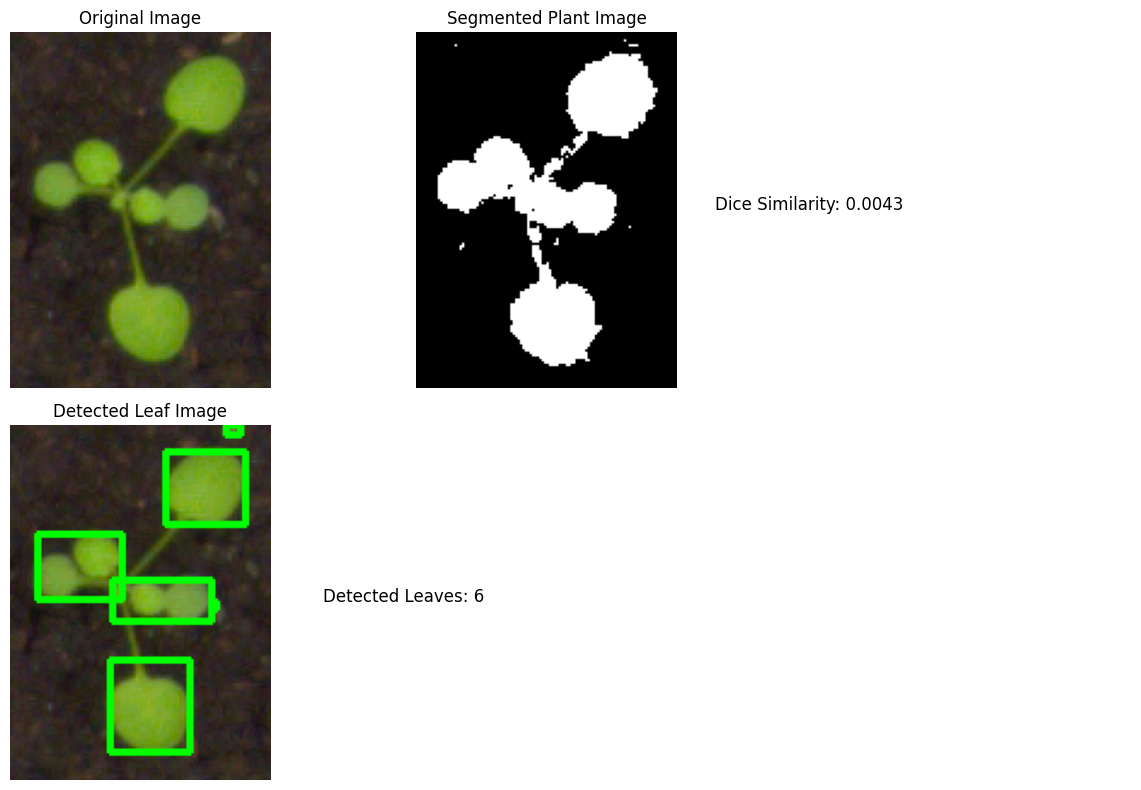

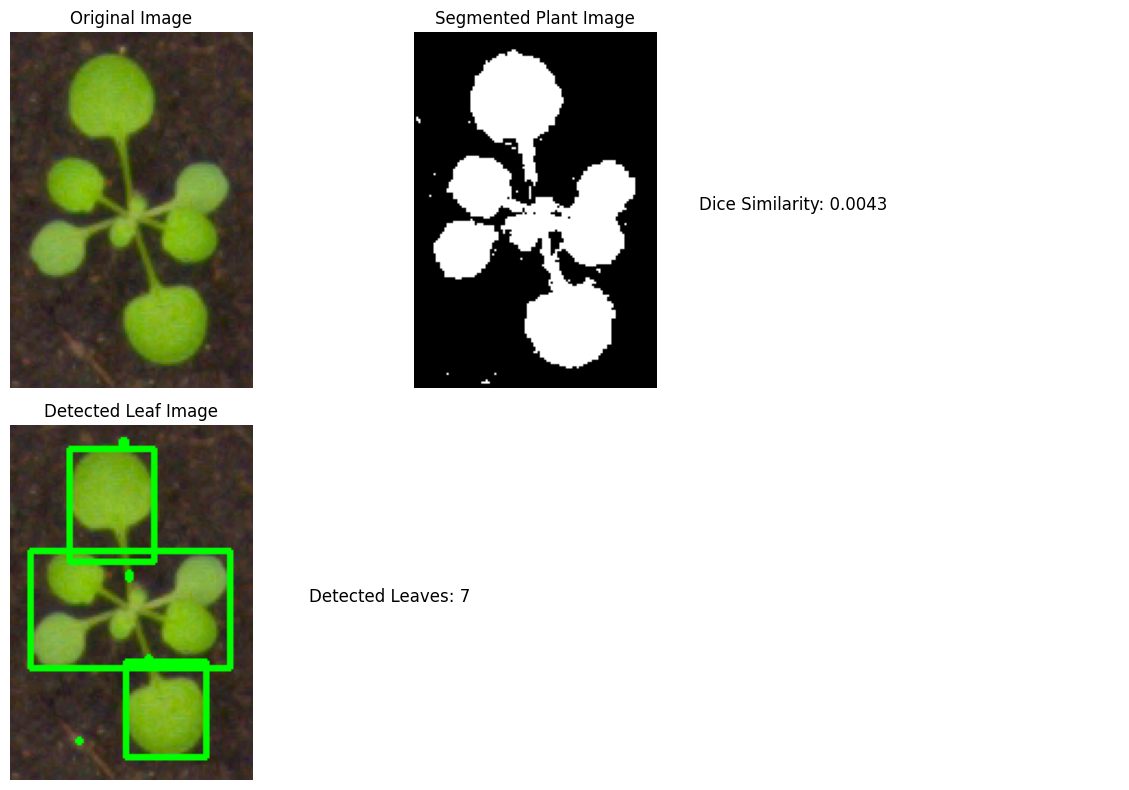

In [34]:
# process images and generate the required outputs for plant_002 and plant_005
selected_plant_images = ["plant002", "plant005"]

for image_name in selected_plant_images:
    image_path = os.path.join("plant image dataset", "Plant", f"{image_name}_rgb.png")
    ground_truth_path = os.path.join("plant image dataset", "Ground Truth", f"{image_name}_label.png")
    
    # Task a: Plant segmentation
    binary_segmented_mask = segment_plant(image_path)
    
    # Task b: Segmentation evaluation
    ground_truth_mask = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    dice_similarity = calculate_dice_similarity(binary_segmented_mask, ground_truth_mask)
    
    # Task c: Leaf detection and counting
    leaf_detection_result, leaf_count = detect_leaves(image_path)
    
    # Display and save results for the selected images
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 2)
    plt.imshow(binary_segmented_mask, cmap="gray")
    plt.title("Segmented Plant Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 3)
    plt.text(0.1, 0.5, f"Dice Similarity: {dice_similarity:.4f}", fontsize=12, ha="center")
    plt.axis("off")
    
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(leaf_detection_result, cv2.COLOR_BGR2RGB))
    plt.title("Detected Leaf Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 5)
    plt.text(0.1, 0.5, f"Detected Leaves: {leaf_count}", fontsize=12, ha="center")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
